# Week 9 Lab


In this lab, we will implement a fuzzy inference system (FIS) to control an intelligent traffic light system. Here, we consider a simple intersection which is made of two streets, Main and Side, and no turning lanes. By default, the traffic lights are green for the Main street and red for the Side street. When there is some traffic on the Side, the FIS is activated. Street sensors provide information on the number of cars on the Main street (incoming traffic) and the number of cars on the Side street (waiting traffic). Based on this information, the FIS needs to make decisions on:

- waiting duration: the duration before the traffic lights on the Side street switch to green; and
- green duration: the duration for which the Side traffic lights stay green.
  Both durations are measured in seconds.

Below is a basic implementation for the traffic light FIS, followed by tesing it on some test cases and some lab tasks.


# A. Basic FIS implementation


In [38]:
# pip install -U scikit-fuzzy

## 1- Inputs & outputs


In [39]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl


waitingTraffic = ctrl.Antecedent(np.arange(1, 100, 1), "waiting")
incomingTraffic = ctrl.Antecedent(np.arange(0, 100, 1), "incoming")

waitingDuration = ctrl.Consequent(np.arange(0, 120, 1), "wait duration")
openDuration = ctrl.Consequent(np.arange(0, 120, 0.1), "open duration")

## 2- Fuzzification & membership functions


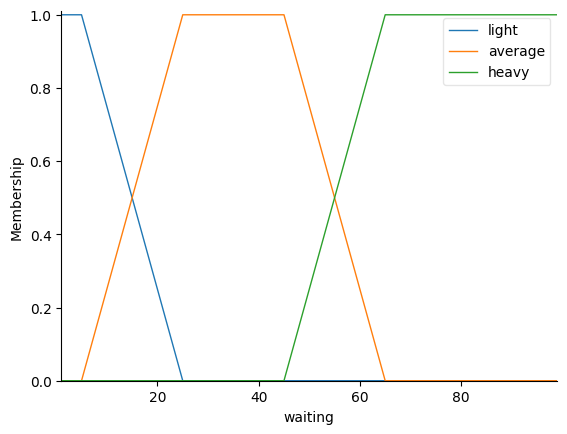

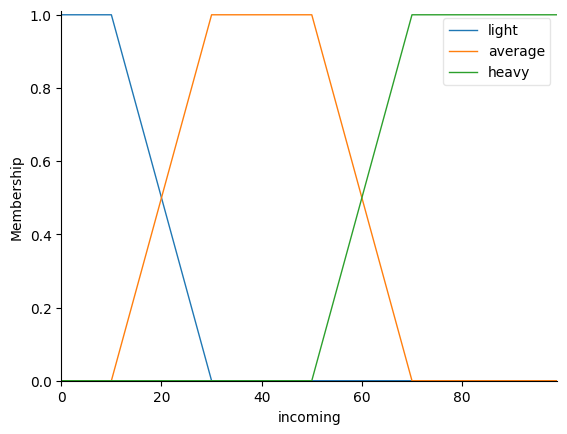

In [40]:
# fuzzySetNamesTraffic = ["light", "average", "heavy"]
# waitingTraffic.automf(names=fuzzySetNamesTraffic)
# incomingTraffic.automf(names=fuzzySetNamesTraffic)
# waitingTraffic.view()
# incomingTraffic.view()

# fuzzySetNamesDuration = ["short", "medium", "long"]
# waitingDuration.automf(names=fuzzySetNamesDuration)
# openDuration.automf(names=fuzzySetNamesDuration)
# waitingDuration.view()
# openDuration.view()

# lets add trapezoidal membership functions
waitingTraffic["light"] = fuzz.trapmf(waitingTraffic.universe, [1, 1, 5, 25])
waitingTraffic["average"] = fuzz.trapmf(waitingTraffic.universe, [5, 25, 45, 65])
waitingTraffic["heavy"] = fuzz.trapmf(waitingTraffic.universe, [45, 65, 100, 100])
incomingTraffic["light"] = fuzz.trapmf(incomingTraffic.universe, [0, 0, 10, 30])
incomingTraffic["average"] = fuzz.trapmf(incomingTraffic.universe, [10, 30, 50, 70])
incomingTraffic["heavy"] = fuzz.trapmf(incomingTraffic.universe, [50, 70, 100, 100])
waitingTraffic.view()
incomingTraffic.view()

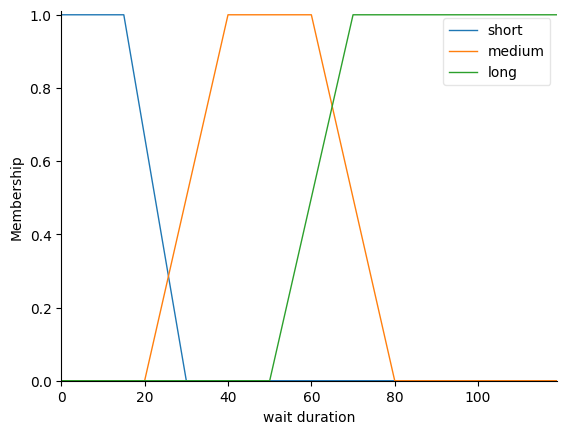

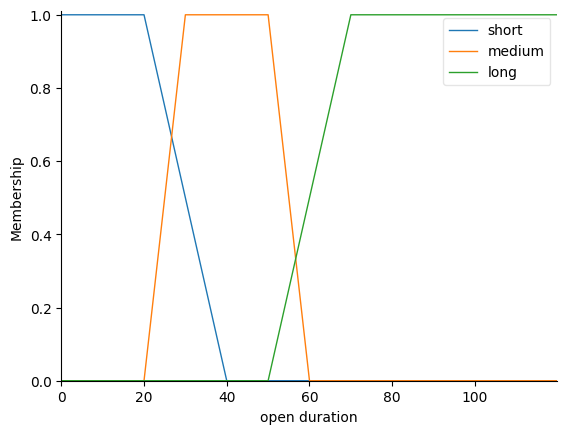

In [41]:
waitingDuration["short"] = fuzz.trapmf(waitingDuration.universe, [0, 0, 15, 30])
waitingDuration["medium"] = fuzz.trapmf(waitingDuration.universe, [20, 40, 60, 80])
waitingDuration["long"] = fuzz.trapmf(waitingDuration.universe, [50, 70, 120, 120])
openDuration["short"] = fuzz.trapmf(openDuration.universe, [0, 0, 20, 40])
openDuration["medium"] = fuzz.trapmf(openDuration.universe, [20, 30, 50, 60])
openDuration["long"] = fuzz.trapmf(openDuration.universe, [50, 70, 120, 120])
waitingDuration.view()
openDuration.view()

## 3- Knowledge base


In [42]:
rule1 = ctrl.Rule(
    incomingTraffic["light"] & waitingTraffic["light"],
    [waitingDuration["short"], openDuration["short"]],
)


rule2 = ctrl.Rule(
    incomingTraffic["light"] & waitingTraffic["average"],
    [waitingDuration["short"], openDuration["medium"]],
)


rule3 = ctrl.Rule(
    incomingTraffic["light"] & waitingTraffic["heavy"],
    [waitingDuration["short"], openDuration["long"]],
)



rule4 = ctrl.Rule(
    incomingTraffic["average"] & waitingTraffic["light"],
    [waitingDuration["medium"], openDuration["short"]],
)


rule5 = ctrl.Rule(
    incomingTraffic["average"] & waitingTraffic["average"],
    [waitingDuration["medium"], openDuration["medium"]],
)


rule6 = ctrl.Rule(
    incomingTraffic["average"] & waitingTraffic["heavy"],
    [waitingDuration["medium"], openDuration["long"]],
)



rule7 = ctrl.Rule(
    incomingTraffic["heavy"] & waitingTraffic["light"],
    [waitingDuration["long"], openDuration["short"]],
)


rule8 = ctrl.Rule(
    incomingTraffic["heavy"] & waitingTraffic["average"],
    [waitingDuration["long"], openDuration["medium"]],
)


rule9 = ctrl.Rule(
    incomingTraffic["heavy"] & waitingTraffic["heavy"],
    [waitingDuration["long"], openDuration["long"]],
)

## 4- Inference Engine


In [43]:
# add any code if needed

## 5- Defuzzification


In [44]:
waitingDuration.defuzzify_method = "centroid"
openDuration.defuzzify_method = "centroid"

# B. Model Usage


Testing on a single test case and visualising the results.


12.0
90.0


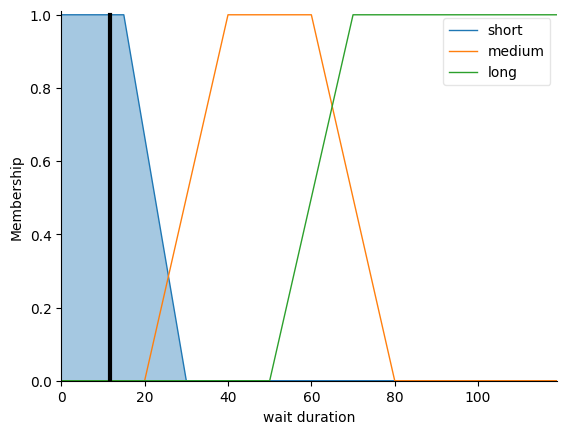

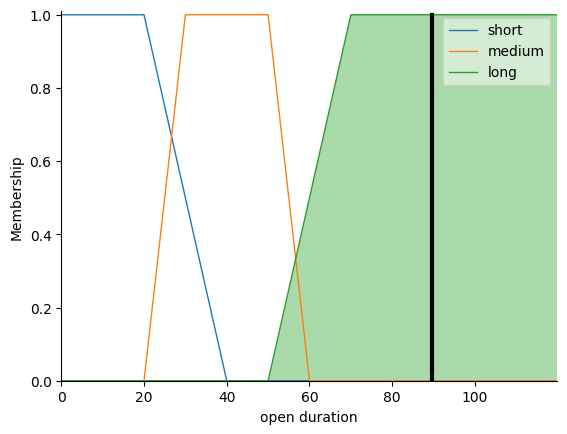

In [45]:
fis = ctrl.ControlSystem(
    [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9]
)


fis_simulator = ctrl.ControlSystemSimulation(fis)



# Now, test yur FIS with some inputs & check the outputs


fis_simulator.input["incoming"] = 2


fis_simulator.input["waiting"] = 80



fis_simulator.compute()


print(round(fis_simulator.output["wait duration"], 0))


waitingDuration.view(sim=fis_simulator)


print(round(fis_simulator.output["open duration"], 0))


openDuration.view(sim=fis_simulator)

Testing on multiple test cases


In [46]:
incoming_test = [0, 15, 20, 40, 12, 8, 59, 50]
waiting_test = [2, 1, 25, 5, 29, 8, 5, 50]

for i in range(incoming_test.__len__()):
    fis_simulator.input["incoming"] = incoming_test[i]
    fis_simulator.input["waiting"] = waiting_test[i]
    fis_simulator.compute()
    print(
        " waiting: "
        + str(waiting_test[i])
        + ", incoming: "
        + str(incoming_test[i])
        + ", wait duration: "
        + str(round(fis_simulator.output["wait duration"], 0))
        + ", open duration: "
        + str(round(fis_simulator.output["open duration"], 0))
    )

 waiting: 2, incoming: 0, wait duration: 12.0, open duration: 16.0
 waiting: 1, incoming: 15, wait duration: 29.0, open duration: 17.0
 waiting: 25, incoming: 20, wait duration: 38.0, open duration: 40.0
 waiting: 5, incoming: 40, wait duration: 50.0, open duration: 16.0
 waiting: 29, incoming: 12, wait duration: 20.0, open duration: 40.0
 waiting: 8, incoming: 8, wait duration: 12.0, open duration: 20.0
 waiting: 5, incoming: 59, wait duration: 70.0, open duration: 17.0
 waiting: 50, incoming: 50, wait duration: 50.0, open duration: 59.0


# C. Lab tasks


- Examine the performance of the FIS under the test cases provided in the previous section. You can also provide additional test cases.
- What are the key performance issues?
- Suggest some fixes that could improve these issue.
- Modify the above code to implement the suggested fixes
- Compare the test performance before & after changes.
